In [8]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pyabf


In [2]:

# Load it back from the file
with open("binned_waveforms.pkl", "rb") as f:
    binned_waveforms = pickle.load(f)

print("Loaded:", list(binned_waveforms.keys())[:5])  # peek at a few keys


Loaded: [(np.float64(25.233409033558843), 'Excitatory', 'CaP', 'primary'), (np.float64(32.61578604044627), 'Excitatory', 'CaP', 'primary'), (np.float64(36.50967506389131), 'Excitatory', 'CaP', 'primary'), (np.float64(26.212319790300285), 'Excitatory', 'CaP', 'primary'), (np.float64(22.836263987212853), 'Excitatory', 'CaP', 'primary')]


In [3]:
from collections import Counter

def get_freq_bin(freq):
    if 15 <= freq < 25:
        return "15–25"
    elif 25 <= freq < 35:
        return "25–35"
    elif 35 <= freq < 45:
        return "35–45"
    elif freq >= 45:
        return "45+"
    else:
        return "<15"

def group_iSMN(cell_type):
    if cell_type in ["iSMN (dorsal) muscle", "iSMN"]:
        return "iSMN"
    return cell_type
key_counts_all = Counter()

for freq, signal_type,cell_type, fast_slow in binned_waveforms.keys():
    freq_bin = get_freq_bin(freq)
    cell_type_gen = group_iSMN(cell_type)
    grouped_key = (freq_bin, signal_type, cell_type_gen, fast_slow)
    key_counts_all[grouped_key] += 1

print(f"Unique waveform types: {len(key_counts_all)}\n")

Unique waveform types: 118



In [4]:
def get_freq_bin(freq):
    if 15 <= freq < 25:
        return "15–25"
    elif 25 <= freq < 35:
        return "25–35"
    elif 35 <= freq < 45:
        return "35–45"
    elif freq >= 45:
        return "45+"


keyCounts_nocelltype = Counter()

for freq, signal_type,cell_type, fast_slow in binned_waveforms.keys():
    freq_bin = get_freq_bin(freq)
    grouped_key = (freq_bin, signal_type, fast_slow)
    keyCounts_nocelltype[grouped_key] += 1

print(f"Unique waveform types: {len(keyCounts_nocelltype)}\n")

Unique waveform types: 45



In [17]:
def average_waveforms_for_key(counter_key):
    '''
    Function that takes a counter key like ('15–25', 'Cell-attached', 'MiP', 'primary')
    Returns df of averaged waveform for that key
    '''
    #Separate key code
    freq_bin, signal_type,cell_type, fast_slow = counter_key
    
    dfs = [] # To store matching waveforms dataframes
    # loop through all binned waveforms
    for key in binned_waveforms.keys():
        freq, st,ct, fs = key
        # use get_freq_bin(freq) to turn float into bin, use group_iSMN() to generalize all iSMN
        if get_freq_bin(freq) == freq_bin and ct == group_iSMN(cell_type) and st == signal_type and fs == fast_slow:
            dfs.append(binned_waveforms[key].copy())
    # if no waveforms for key
    if not dfs:
        print(f"No matching waveforms found for {counter_key}")
        return None
    # combine all the data frames
    # print(len(dfs))
    combined = pd.concat(dfs)
    # print(combined.shape)
    averaged = combined.groupby('Phase Bin', observed=False).mean().reset_index()
    return averaged

/var/folders/mw/pz4gm95j6zb7syl48vm11wrw0000gn/T/ipykernel_14897/4164670431.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10', len(signal_types))  # or use 'Set1', 'tab20', etc.


Plotting waveforms for swimming speed: primary


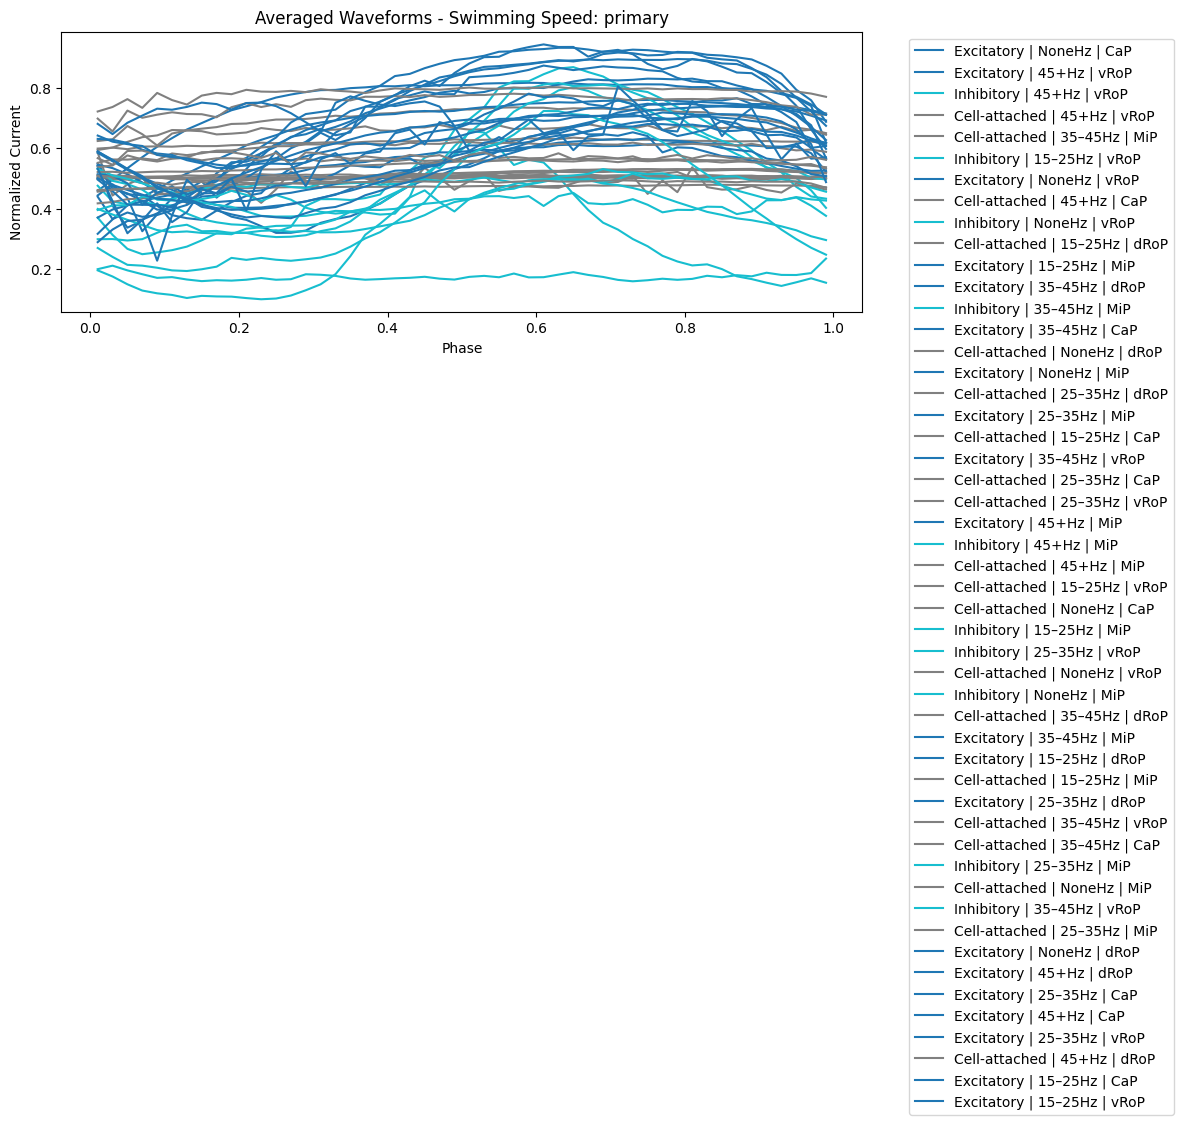

Plotting waveforms for swimming speed: Low Rin Secondary 


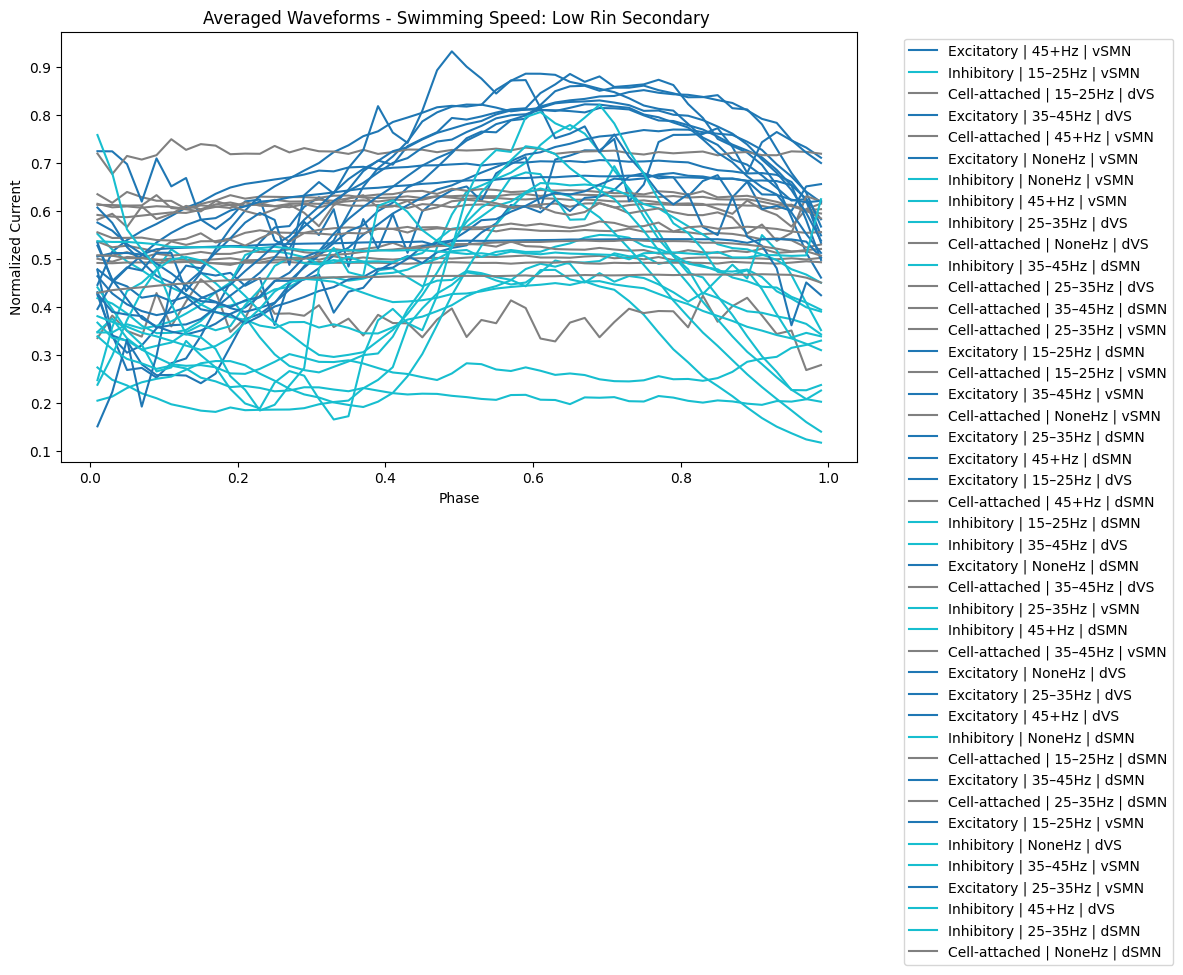

Plotting waveforms for swimming speed: High Rin Secondary
No matching waveforms found for ('35–45', 'Excitatory', 'iSMN', 'High Rin Secondary')
  Skipping: No data for ('35–45', 'Excitatory', 'iSMN', 'High Rin Secondary')
No matching waveforms found for ('25–35', 'Inhibitory', 'iSMN', 'High Rin Secondary')
  Skipping: No data for ('25–35', 'Inhibitory', 'iSMN', 'High Rin Secondary')
No matching waveforms found for ('15–25', 'Excitatory', 'iSMN', 'High Rin Secondary')
  Skipping: No data for ('15–25', 'Excitatory', 'iSMN', 'High Rin Secondary')
No matching waveforms found for ('35–45', 'Inhibitory', 'iSMN', 'High Rin Secondary')
  Skipping: No data for ('35–45', 'Inhibitory', 'iSMN', 'High Rin Secondary')
No matching waveforms found for ('25–35', 'Excitatory', 'iSMN', 'High Rin Secondary')
  Skipping: No data for ('25–35', 'Excitatory', 'iSMN', 'High Rin Secondary')
No matching waveforms found for ('45+', 'Excitatory', 'iSMN', 'High Rin Secondary')
  Skipping: No data for ('45+', 'Excit

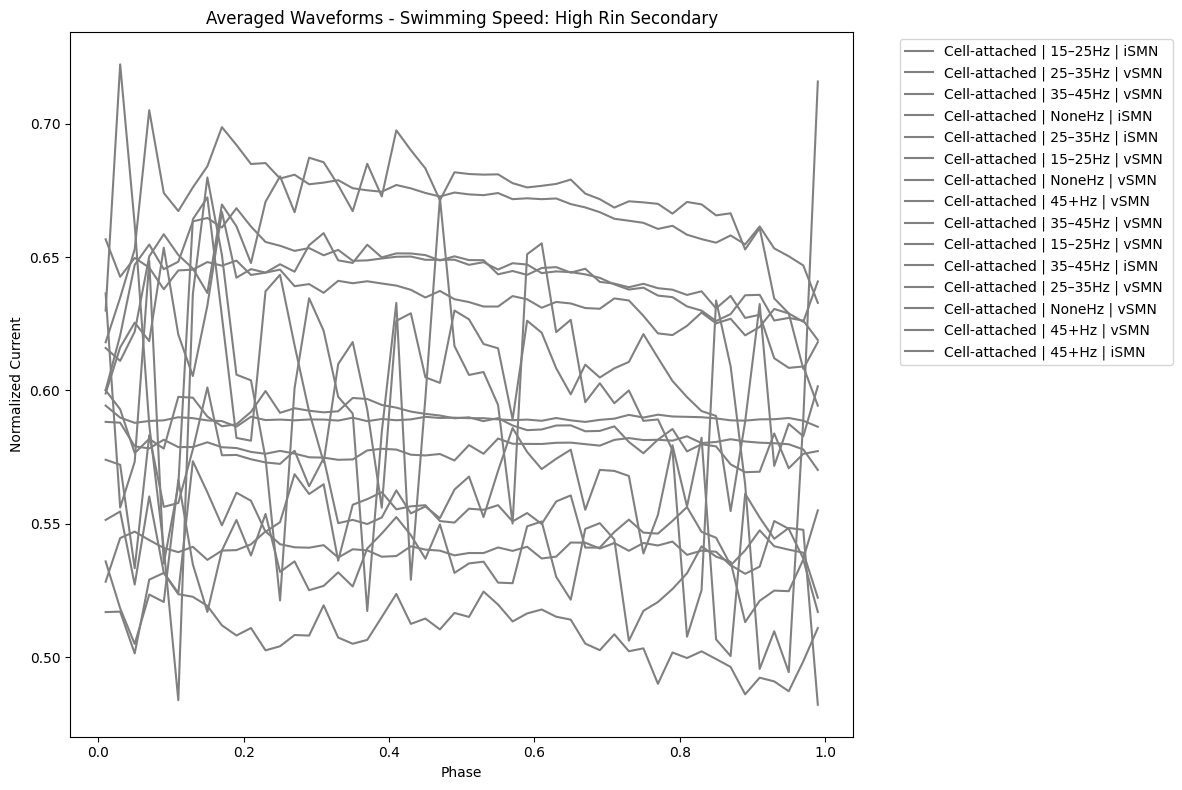

In [22]:
import matplotlib.pyplot as plt
from collections import defaultdict
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Step 1: Group waveform keys by fast_slow (swimming speed)
waveforms_by_speed = defaultdict(list)
# signal_types = set()

for freq, signal_type, cell_type, fast_slow in binned_waveforms.keys():
    freq_bin = get_freq_bin(freq)
    cell_type_gen = group_iSMN(cell_type)
    grouped_key = (freq_bin, signal_type, cell_type_gen, fast_slow)
    waveforms_by_speed[fast_slow].append(grouped_key)
    # signal_types.add(signal_type)

signal_types = ["Inhibitory","Excitatory"]
# Step 2: Assign a unique color to each signal type
cmap = cm.get_cmap('tab10', len(signal_types))  # or use 'Set1', 'tab20', etc.
signal_type_colors = {stype: cmap(i) for i, stype in enumerate(sorted(signal_types))}

# Step 3: Plot one figure per swimming speed, with color coding by signal type
for speed_category, keys in waveforms_by_speed.items():
    plt.figure(figsize=(12, 8))
    print(f"Plotting waveforms for swimming speed: {speed_category}")

    plotted_any = False
    for key in set(keys):
        try:
            avg_waveform_df = average_waveforms_for_key(key)
            if avg_waveform_df is None or avg_waveform_df.empty:
                print(f"  Skipping: No data for {key}")
                continue

            signal_type = key[1]
            color = signal_type_colors.get(signal_type, 'gray')  # default to gray if missing
            label = f"{signal_type} | {key[0]}Hz | {key[2]}"
            plt.plot(avg_waveform_df['Phase'], avg_waveform_df['Normalized Current'],
                     label=label, color=color)
            plotted_any = True
        except Exception as e:
            print(f"  Error with {key}: {e}")
            continue

    if plotted_any:
        plt.xlabel('Phase')
        plt.ylabel('Normalized Current')
        plt.title(f'Averaged Waveforms - Swimming Speed: {speed_category}')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()
    else:
        print(f"  No valid waveforms to plot for {speed_category}")
